### Importing Libraries

  - `pandas` as `pd` for data manipulation and analysis.
  - `numpy` as `np` for numerical operations.
  - `matplotlib.pyplot` as `plt` for creating visualizations.
  - `ast` for safely evaluating strings into python objects.
  - `seaborn` as `sns` for statistical data visualization and enhanced plotting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

### Loading Data

- **Reading CSV File:** reading a csv file  into a dataframe named `df`, which is used for data analysis and manipulation.


In [2]:
df = pd.read_csv(r'D:\Python\Files\data_jobs.csv')
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
421908,Data Engineer,Staff Data Engineer - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-11-29 16:08:52,True,True,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"['python', 'sql', 'aws', 'redshift', 'airflow'...","{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
523684,Data Scientist,Data Scientist - Hybrid Remote,"Atlanta, GA",via IT JobServe,Full-time,False,"Florida, United States",2023-08-08 11:05:27,False,True,United States,year,72870.0,NaN,UMB Bank,"['r', 'python', 'sql', 'sql server', 'snowflak...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."


### Data Cleanup

- **Renaming Columns:** assigning new column names to the dataframe.

- **Converting Dates:** using `pd.to_datetime()` to change the 'posted_dt' column from string to datetime format.

- **Converting Skills:**
  - using `.apply() `function to convert 'skills' from string to list format by applying a custom function to  every row of a dataFrame.
  - using `ast.literal_eval()` to evaluate and convert strings to python objects.
  - ensuring conversion only happens if the value is not missing using `pd.notna(gg)`.

- **Handling Missing Values:** optionally dropping rows with missing values in the 'salyr' column using `df.dropna()` (commented out).

In [3]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt']) 
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)
#df.dropna(subset=['salyr'],inplace=True)

### Sample

-  Random sample of 2 rows from the modified dataFrame `df`

In [4]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
523501,Business Analyst,Junior Business Analyst,Hong Kong,via Trabajo.org,Full-time,False,Hong Kong,2023-05-16 11:19:30,False,False,Hong Kong,NaN,NaN,NaN,AA Choice Peronnel Consultancy Limited,[word],{'analyst_tools': ['word']}
594961,Data Engineer,Data Engineer/Analyst,"San Mateo, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-10 09:01:15,True,False,United States,NaN,NaN,NaN,Veryfi,"[sql, mongo, shell, python, mysql, neo4j, redi...","{'databases': ['mysql', 'neo4j', 'redis'], 'li..."


### Filtering and Copying

- **Creating a New DataFrame:** creating a new dataframe 'df_ind' that contains only the rows from the original dataframe 'df' where the 'country' column has the value 'India'.
  
- **Copying Data:** using the `.copy()` method to copy the filtered data for further processing, ensuring that changes to `df_ind` do not affect `df`.


In [5]:
df_ind = df[df['country']== 'India'].copy()
df_ind.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
687669,Senior Data Analyst,Senior BI Analytics Engineer,Anywhere,via LinkedIn,Full-time,True,India,2023-02-08 18:11:15,True,False,India,NaN,NaN,NaN,IRIS Software Group,"[sql, sql server, ssis, ssrs]","{'analyst_tools': ['ssis', 'ssrs'], 'databases..."
36656,Data Scientist,Associate Lead Data Scientist,India,via LinkedIn,Full-time,False,India,2023-07-14 13:13:13,False,False,India,NaN,NaN,NaN,Sigmoid,"[python, r, sql, nosql, aws, azure, gcp, spark...","{'cloud': ['aws', 'azure', 'gcp'], 'libraries'..."


### Exploding 

- **Expanding Skills Lists:** expanding the lists in the 'skills' column of `df_ind` into separate rows, where each skill in a list is placed into its own row and duplicating the other column values for each new row.

- **Creating a New DataFrame:** creating a new dataframe `df_explode` from the expanded data.

In [6]:
df_explode = df_ind.explode('skills')
df_explode.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
515955,Data Engineer,Associate - Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-04-06 11:15:47,False,False,India,NaN,NaN,NaN,TIAA,java,"{'async': ['jira'], 'cloud': ['aws'], 'program..."
168998,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Full-time,False,India,2023-10-20 15:15:31,False,False,India,NaN,NaN,NaN,Hero FinCorp.,cassandra,"{'databases': ['cassandra'], 'libraries': ['ha..."


### Counting Occurrences


   
-  `df_ind['job'].value_counts()` = counting the occurrences of each unique value in the 'job' column of `df_ind`.

-  `.reset_index(name='job count')` =
   i. converting the series to a dataframe.
   ii. `.reset_index()` turning the index (job titles) into a column, and the counts becoming a new column named 'job count'.


In [7]:
df_jobs = df_ind['job'].value_counts().reset_index(name='job count')
df_jobs

,job,job count
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


### Aggregating and Sorting 

- **Grouping and Counting:** grouping the `df_explode` by both 'job' and 'skills', then calculating the count of each skill for each job title. this results in a series with a multiIndex (job and skills) and counts as values.

- **Converting to DataFrame:** converting the series into a dataframe with 'job', 'skills', and 'skill count' columns, where 'skill count' contains the counts of each skill for each job.

- **Sorting DataFrame:** sorting the dataframe in descending order based on 'skill count', so the most common skills appear first.

In [8]:
df_skills = df_explode.groupby(['job','skills'])['skills'].agg('size')
df_skills = df_skills.reset_index(name='skill count')
df_skills.sort_values(by='skill count',ascending=False,inplace=True)

df_skills

,job,skills,skill count
637,Data Engineer,sql,12993
603,Data Engineer,python,11568
807,Data Scientist,python,9248
632,Data Engineer,spark,7157
480,Data Engineer,aws,6993
...,...,...,...
1472,Senior Data Scientist,svn,1
998,Machine Learning Engineer,svn,1
138,Business Analyst,twilio,1
835,Data Scientist,solidity,1


### Extracting and Selecting

- **Extracting Unique Job Titles:** `df_skills['job'].unique().tolist()` extracts the unique job titles from the 'job' column of `df_skills` and converts them to a list.

- **Sorting Job Titles:** `sorted(job_titles[:3])` selects the first three job titles from the list and sorts them alphabetically.

In [9]:
job_titles = df_skills['job'].unique().tolist()
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Merging DataFrames

- **Merging Job Counts with Skill Counts:**
  - merging the `df_skills` and `df_jobs` dataframes
  - on the 'job' column using an inner join
  - the new dataframe `df_jobs_skills` will contain the job titles along with their skill counts and job counts, including only the job titles that appear in both original dataframes

In [10]:
df_jobs_skills = pd.merge(df_skills, df_jobs, on='job', how='inner')

### Calculating  Skill Percentages

- **Creating Skill Percentage Column:** creating a new column 'skill %' in the `df_jobs_skills`, which gives the percentage of each skill relative to the total number of job postings for that job title.

- **Rounding Result:** rounding the result to one decimal place.

In [11]:
df_jobs_skills ['skill %'] = (100*  (df_jobs_skills['skill count']/df_jobs_skills['job count'])).round(1)
df_jobs_skills['skill %']

0       68.2
1       60.7
2       69.6
3       37.5
4       36.7
        ... 
1684     0.0
1685     0.1
1686     0.1
1687     0.0
1688     0.1
Name: skill %, Length: 1689, dtype: float64

### Plotting Top Skills by Job Title

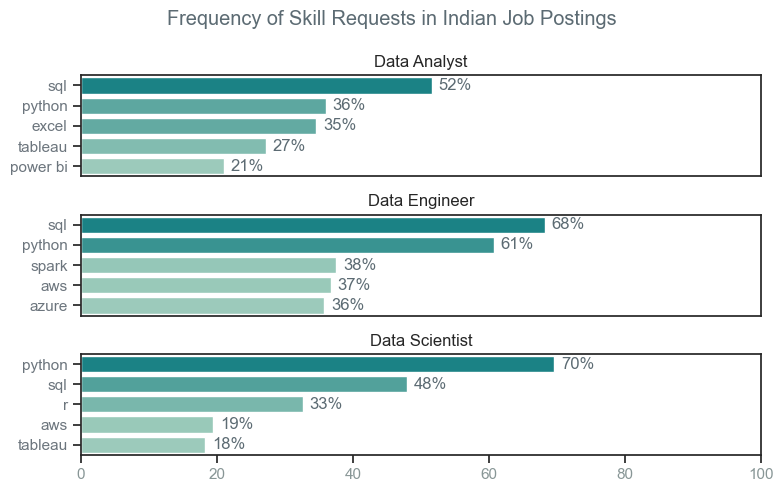

In [12]:
import matplotlib.colors as mcolors

# Setting Up for Plot
gradient_palette = mcolors.LinearSegmentedColormap.from_list( 'gradient_palette', ['#94d2bd', '#0a9396'], N=100)
sns.set_theme(style='ticks')
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8,5))

# Creating Plot
for i, job_name in enumerate(job_titles):
    df_plt = df_jobs_skills[df_jobs_skills['job'] == job_name].head(5)
    sns.barplot(data=df_plt, x='skill %', y='skills', ax=ax[i], hue='skill count', palette=gradient_palette)

    # Modifying Axes and Labels
    ax[i].set_title(job_name)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 100)

    # Set the color of x-axis and y-axis ticks
    ax[i].tick_params(axis='x', labelcolor='#889696')
    ax[i].tick_params(axis='y', labelcolor='#6c757d')

    # Removeing the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # Labeling the percentage on the bars
    for p, q in enumerate(df_plt['skill %']):
        ax[i].text(q + 1, p, f'{q:.0f}%', va='center', color = '#5c6b73')

# Modifying the entire figure
plt.suptitle('Frequency of Skill Requests in Indian Job Postings', color = '#5c6b73')

# Displaying the plot
plt.tight_layout()
plt.show()


<span style="color:#d7ba7d; font-size:50px;"> End </span>

---